In [2]:
###Folders

Input_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Intermediate_objects/'
Output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'


'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

In [3]:
##Importing libraries
from joblib import dump, load
import os, sys, pickle, time, re, csv
from collections import defaultdict#

import numpy as np
import pandas as pd

import scipy.stats as st
#import pycircstat as circ_st
import math

import matplotlib.pyplot as plt
import seaborn as sns
import collections, numpy

from itertools import groupby
from pingouin import partial_corr
from collections import Counter
import random
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy.stats import circmean
from scipy.ndimage import gaussian_filter1d
import warnings


C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [14]:
from collections import defaultdict
def rec_dd():
    return defaultdict(rec_dd)

def remove_empty(xx):

    yy= [x for x in xx if len(x) > 0]
    return(yy)

def rand_jitterX(arr, X):
    stdev = X*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

##convert nested dict into array
def dict_to_array(d):
    dictlist=[]
    for key, value in d.items():
        dictlist.append(value)
    return(np.asarray(dictlist))

def rank_repeat(a):
    arr=np.zeros(len(a))
    for n in np.unique(a):
        count=0
        for ii in range(len(a)):
            if a[ii]==n:
                arr[ii]=count
                count+=1

    arr=arr.astype(int)
    return(arr)

def concatenate_complex2(xx):

    ALL_elements=[]
    for ii in np.arange(len(xx)):
        xxii=xx[ii]
        for jj in np.arange(len(xxii)):
            xxiijj=xxii[jj]
            ALL_elements.append(np.asarray(xxiijj))
            
    return(np.asarray(ALL_elements))

def smooth_circular(x,sigma=10):
    return(gaussian_filter1d(np.hstack((x,x,x)),sigma,axis=0)[len(x):int(len(x)*2)])

def polar_plot_stateX2(meanx,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=[], structure_abstract='ABCD',fontsize=20,set_max=False,max_val=1):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    #ax=plt.subplot(111, projection='polar')
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        if set_max==False:
            ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        else:
            ax.set_rmax(max_val)
            
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        if structure_abstract=='ABCD':
            ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==False:
            ax.set_xticklabels(['A', '', '', '', 'B', '', '', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==True:
            ax.set_xticklabels(['A', '', 'B', '', 'A', '', 'B', ''],fontsize=fontsize)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=fontsize)

def indep_roll(arr, shifts, axis=1):
    """Apply an independent roll for each dimensions of a single axis.

    Parameters
    ----------
    arr : np.ndarray
        Array of any shape.

    shifts : np.ndarray
        How many shifting to use for each dimension. Shape: `(arr.shape[axis],)`.

    axis : int
        Axis along which elements are shifted. 
    """
    arr = np.swapaxes(arr,axis,-1)
    all_idcs = np.ogrid[[slice(0,n) for n in arr.shape]]

    # Convert to a positive shift
    shifts[shifts < 0] += arr.shape[-1] 
    all_idcs[-1] = all_idcs[-1] - shifts[:, np.newaxis]

    result = arr[tuple(all_idcs)]
    arr = np.swapaxes(result,-1,axis)
    return arr 

def bar_plotX(y,name,ymin,ymax,points,pairing,jitt):
    leny=len(y)
    plt.figure(figsize=(leny*(3/2),6))
    
    if ymin =='auto':
        ymin=np.min(np.concatenate(y))
    if ymax =='auto':
        ymax=np.max(np.concatenate(y))
    
    ##bars
    y_mean=((np.zeros(len(y))))
    y_sem=((np.zeros(len(y))))
    for ii in range(0, len(y)):
        ymeanx=np.nanmean(y[ii])
        y_mean[ii]=ymeanx
        ysemx=st.sem(y[ii], nan_policy='omit')
        y_sem[ii]=ysemx
   
    
    xxx=np.linspace(0.15, 0.2+(0.2*(leny-1)), leny)

    xlocations = np.array(range(len(xxx)))
    width=0.2
    plt.bar(xxx, y_mean, width, yerr=y_sem, alpha=1, 
           error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center')
    
    if points != 'points' and ymin == 'auto':
        ymin=np.min(y_mean-y_sem) #-np.max(y_sem)
        ymax=np.max(y_mean+y_sem) #+np.max(y_sem)
    
    #if ymin>0:
    #    ymin=0
    plt.ylim(ymin-(0.05*(ymax-ymin)),ymax+(0.05*(ymax-ymin)))
    plt.xlim(0,np.max(xxx)+0.15)
    
    

    ###points and lines
    if points == 'points':
        yyALL=[]
        for ii in range(0, len(y)):
            yy=np.column_stack((y[ii],np.repeat(xxx[ii],len(y[ii]))))
            yyALL.append(yy)

        xy=np.vstack((yyALL))
        jittered=rand_jitterX(xy[:,1],jitt)

        if pairing == 'paired':
            for ii in range(0, leny):
                x1=np.split(jittered,len(y))[ii]
                if ii == 0:
                    x1_all=x1
                else:
                    x1_all=np.column_stack((x1_all,x1))

            for jj in range(0,np.shape(y)[1]):
                yyyy=np.asarray(y)[:,jj]
                plt.plot(x1_all[jj],yyyy, color='gray')
        plt.plot(jittered,xy[:,0],'o',markersize=7,color='white',markeredgecolor='black')
    
    if name != 'none':
        plt.savefig(name)
    
    #plt.show()

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def plot_scatter(x,y,name='none'):
    plt.plot(x, y, 'o')
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))

    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    if name != 'none':
        plt.savefig(name)
    plt.show()
    

    
def circular_sem(a):
    if len(np.shape(a))==2:
        sem_=np.rad2deg(np.hstack(([st.circvar(remove_nan(a[:,ii]))/np.sqrt(len(remove_nan(a[:,ii])))\
                               for ii in range(len(a.T))])))
    elif len(np.shape(a))==1:
        sem_=np.rad2deg(st.circvar(remove_nan(a))/np.sqrt(len(remove_nan(a))))
        
    return(sem_)
    
def non_repeat_ses_maker(mouse_recday):
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
    num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)

    non_repeat_bool_all=[]
    for ses_ind in np.arange(len(Tasks)):
        if ses_ind==0:
            non_repeat_bool=True
        else:
            num_prev_repeats=np.sum([np.array_equal(Tasks[ses_ind],Tasks[:ses_ind][jj])\
                                     for jj in range(len(Tasks[:ses_ind]))])
            if num_prev_repeats==0:
                non_repeat_bool=True
            else:
                non_repeat_bool=False

        non_repeat_bool_all.append(non_repeat_bool)
    non_repeat_bool_all=np.hstack((non_repeat_bool_all))
    num_trials_bool=num_trials_day>0
    non_repeat_ses_bool=np.logical_and(non_repeat_bool_all,num_trials_bool)

    non_repeat_ses=np.where(non_repeat_ses_bool==True)[0]
    return(non_repeat_ses)

def two_proportions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)
    
def remove_nan(x):
    x=x[~np.isnan(x)]
    return(x)

def unique_nosort(a):
    indexes = np.unique(a, return_index=True)[1]
    return(np.asarray([a[index] for index in sorted(indexes)]))

def one_hot_encode(x,length):
    array=np.zeros((len(x),length))
    for entry in np.arange(len(x)):
        if ~np.isnan(x[entry]):
            array[entry,int(x[entry])]=1
    return(array)

def data_matrix(data, concatenate=False):
    data_mat=np.asarray([data[ii][:len(data[-1])] for ii in range (len(data))])
    if concatenate==True:
        data_mat=np.concatenate(np.hstack(data_mat))
    return(data_mat)

###counts num of repeats for each stretch of numbers
def rank_repeat2(a):
    num_repeats=number_of_repeats(a)
    arr=[]
    for n_ind, n in enumerate(unique_adjacent(a)):
        count=0
        indices=np.arange(num_repeats[n_ind])
        arr.append(indices)
    arr=np.concatenate(arr)
    arr=arr.astype(int)
    return(arr)

def number_of_repeats(array):
    return(np.asarray([sum(1 for _ in group) for _, group in groupby(array)]))

def unique_adjacent(a):
    return(np.asarray([k for k,g in groupby(a)]))

def matrix_triangle(a,direction='upper',return_indices=False):
    if direction=='upper':
        indices=np.triu_indices(len(a), k = 1)
    if direction=='lower':
        indices=np.tril_indices(len(a), k = -1)
    triangle=a[indices]
    if return_indices==True:
        return(triangle,indices)
    else:
        return(triangle)
    
    
def edge_node_fill(edge_mat,node_mat):
    new_mat=np.copy(edge_mat)
    for ii in [0,2,4]:
        new_mat[ii,0]=node_mat[int(ii/2),0]
        new_mat[ii,2]=node_mat[int(ii/2),1]
        new_mat[ii,4]=node_mat[int(ii/2),2]
        
    return(new_mat)

def _nanargmin(arr, axis=0):
    try:
        if len(np.shape(arr))==1:
            return np.nanargmin(arr)
        else:
            return np.nanargmin(arr, axis)
    except ValueError:
        return np.nan
    
def _nanargmax(arr, axis=0):
    try:
        if len(np.shape(arr))==1:
            return np.nanargmax(arr)
        else:
            return np.nanargmax(arr, axis)
    except ValueError:
        return np.nan

from collections import Counter
from itertools import combinations
def most_common_pair(a_):
    a=np.copy(a_)
    d  = Counter()
    for sub in a:
        if len(a) < 2:
            continue
        #sub.sort()
        for comb in combinations(sub,2):
            d[comb] += 1

    return([d.most_common()[0][0][0],d.most_common()[0][0][1]], d.most_common()[0][1]/len(a))

def polar_plot_stateX(meanx,upperx,lowerx,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=None):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    ax = plt.subplot(111, projection='polar')
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=20)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=20)

    #plt.show()
    
def fill_diagonal(source_array, diagonal):
    copy = source_array.copy()
    np.fill_diagonal(copy, diagonal)
    return copy

def column_stack_clean(x,y):
    xy=np.column_stack((x,y))
    xy=xy[~np.isnan(xy).any(axis=1)]
    xy=xy[~np.isinf(xy).any(axis=1)]
    x=xy[:,0]
    y=xy[:,1]
    xy_new=np.column_stack((x,y))
    return(xy_new)

def noplot_scatter(x,y, color):
    plt.plot(x, y, 'o', color=color, alpha=0.7,markersize=7)
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))
    
    global xmin
    global xmax
    global ymin
    global ymax
    
    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1    
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    


    #plt.xlim(-0.2,0.2)
    #plt.ylim(-0.2,0.2)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.gca().set_aspect('equal', adjustable='box')
    

def is_invertible(a):
     return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

def binned_arrayX(arr, n,statistic='mean'):        
    m=int(len(arr.T)/n)
    if statistic=='mean':
        return(np.mean(arr.reshape(len(arr), n, m), 2))
    elif statistic=='sum':
        return(np.mean(arr.reshape(len(arr), n, m), 2))

In [8]:
##Importing meta Data
Mice_cohort_dic={'me03':2,'me04':2,'me05':2,'me06':2,'me08':3,'ah02':3,'ah03':3,'me10':4,'me11':4,'ah04':4,'ah05':4,\
                'ab03':6,'ah07':6}
Mice_recnode_dic={'me03':110,'me08':131,'ah02':129,'ah03':110}
Mouse_FPGAno={'me03':'109.0','me08':'121.0','ah02':'109.0','ah03':'109.0'}
Mice=np.asarray(list(Mice_cohort_dic.keys()))
Nonephys_mice=['me04','me05','me06','me12','me13']
Ephys_mice=np.setdiff1d(Mice,Nonephys_mice)

Cohort_ephys_type_dic={2:'Cambridge_neurotech',3:'Cambridge_neurotech',4:'Cambridge_neurotech',\
                      5:'Neuropixels',6:'Neuropixels'}

Mice_sleep=[mouse+'_sleep' for mouse in Ephys_mice]
Mice_withsleep=np.hstack((Mice,Mice_sleep))

Variable_dic=rec_dd()

for mouse in Mice_withsleep:
    cohort=Mice_cohort_dic[mouse[:4]]
    MetaDatafile_path=Input_folder+'MetaData.xlsx - '+mouse+'.csv'
    with open(MetaDatafile_path, 'r') as f:
        MetaData = np.genfromtxt(f, delimiter=',',dtype=str, usecols=np.arange(0,18))
    MetaData_structure=MetaData[0]
    Include_mask=MetaData[1:,np.where(MetaData[0]=='Include')[0][0]]=='1' ##added 06/07/2021
    for indx, variable in enumerate(MetaData_structure):
        if variable != 'Weight_pre':
            Variable_dic[mouse][variable]=np.asarray(remove_empty(MetaData[1:,indx][Include_mask]))
        else:
            Variable_dic[mouse][variable]=MetaData[1:,indx][Include_mask]

structure_nums=(np.linspace(1,10,10)).astype(int)
states=np.asarray(['A','B','C','D'])
place_type_dic={1:2,2:1,3:2,4:1,5:0,6:1,7:2,8:1,9:2}

for mouse in Mice:
    Variables=Variable_dic[mouse]
    Structure_no_=Variables['Structure_no']
    Structure_no_[Structure_no_=='-']=-1

In [10]:
Awake_sesind_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    mouse=mouse_recday.split('_',1)[0]
    rec_day=mouse_recday.split('_',1)[1]
    rec_day1=rec_day.split('_',1)[0]
    rec_day2=rec_day.split('_',1)[1]
    Date1=rec_day1[-4:]+'-'+rec_day1[2:4]+'-'+rec_day1[:2]
    Date2=rec_day2[-4:]+'-'+rec_day2[2:4]+'-'+rec_day2[:2]

    mouse_recday1=mouse+'_'+rec_day1
    mouse_recday2=mouse+'_'+rec_day2
    
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy')
    Task_ind_it=0
    Task_ind_dup_all=np.zeros(len(Tasks))
    for Task_ind, Task in enumerate(Tasks):
        repeated_tasks=np.where((Tasks[:Task_ind] == (Task)).all(axis=1))[0]
        if len(repeated_tasks)==0:
            Task_ind_dup=Task_ind_it
            Task_ind_it+=1
        else:
            Task_ind_dup=Task_ind_dup_all[repeated_tasks[0]]
        Task_ind_dup_all[Task_ind]=Task_ind_dup
    
    awake_sessions=np.load(Input_folder+'awake_session_'+mouse_recday+'.npy')    
    first_day2_ses_timestamp=Variable_dic[mouse]['Ephys'][np.where(Variable_dic[mouse]['Date']==Date2)[0]][0]
    first_day2_ses_ind=np.where(awake_sessions==first_day2_ses_timestamp)[0][0]
    first_day2_awakeses=np.repeat(False,len(awake_sessions))
    first_day2_awakeses[first_day2_ses_ind]=True

    Awake_sesind_dic[mouse_recday]=Task_ind_dup_all
    Awake_sesind_dic['first_day2_boolean'][mouse_recday]=first_day2_awakeses

In [12]:
###sleep stages 

sleep_stage_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    mouse=mouse_recday.split('_',1)[0]
    rec_day=mouse_recday.split('_',1)[1]
    rec_day1=rec_day.split('_',1)[0]
    rec_day2=rec_day.split('_',1)[1]
    Date1=rec_day1[-4:]+'-'+rec_day1[2:4]+'-'+rec_day1[:2]
    Date2=rec_day2[-4:]+'-'+rec_day2[2:4]+'-'+rec_day2[:2]

    mouse_recday1=mouse+'_'+rec_day1
    mouse_recday2=mouse+'_'+rec_day2
    
    awake_sessions=np.load(Input_folder+'awake_session_'+mouse_recday+'.npy')
    sleep_sessions=np.load(Input_folder+'sleep_session_'+mouse_recday+'.npy')
    all_sessions=np.load(Input_folder+'All_session_'+mouse_recday+'.npy')

    sleep_ses_inds=np.asarray([ses_ind for ses_ind, ses in enumerate(all_sessions) if ses in sleep_sessions])
    awake_ses_inds=np.asarray([ses_ind for ses_ind, ses in enumerate(all_sessions) if ses in awake_sessions])


    sleep_stages=np.asarray(np.repeat('preXXX',len(sleep_ses_inds)))

    for awake_ses_ind, all_ses_ind in enumerate(awake_ses_inds):
        stage='post'+str(int(Awake_sesind_dic[mouse_recday][awake_ses_ind]))
        sleep_stages[sleep_ses_inds>all_ses_ind]=stage
    
    ###Dealing with the first session of day 2 (or 3/4...etc) 
    first_day2_ses_timestamp=Variable_dic[mouse+'_sleep']['Ephys'][np.where(Variable_dic[mouse+'_sleep']['Date']\
                                                                            ==Date2)[0]][0]
    first_day2_ses_ind=np.where(sleep_sessions==first_day2_ses_timestamp)[0][0]
    first_day2_ses=np.repeat(False,len(sleep_sessions))
    first_day2_ses[first_day2_ses_ind]=True
    #first_day2_ses=np.asarray([np.logical_and(int(sleep_sessions[ii][:2])<int(sleep_sessions[ii-1][:2]),ii>0)\
    #        for ii in range(len(sleep_sessions))])
    #first_day2_ses_ind=np.where(first_day2_ses==True)[0][0]
    same_firstday2ses_bool_all=np.repeat(False,len(sleep_sessions))
    for sleep_ses_ind in np.arange(len(sleep_sessions)):
        same_firstday2ses_bool=np.logical_and(sleep_stages[sleep_ses_ind]==sleep_stages[first_day2_ses],\
                                     sleep_ses_ind==int(first_day2_ses_ind+1))[0]
        if same_firstday2ses_bool==True:
            first_day2_ses_ind+=1
        same_firstday2ses_bool_all[sleep_ses_ind]=same_firstday2ses_bool    
        
    sleep_stages[first_day2_ses]='preX2'
    sleep_stages[same_firstday2ses_bool_all]='preX2'

    sleep_stages[sleep_stages=='preXXX']='preX'
    sleep_stage_dic[mouse_recday]=np.asarray(sleep_stages)

In [15]:
#sleep activity per stage

rescaling_factor=1 #1=no rescaling
Activity_sleep_stage_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    sleep_sessions=np.load(Input_folder+'sleep_session_'+mouse_recday+'.npy')
    All_sessions=np.load(Input_folder+'All_session_'+mouse_recday+'.npy')
    stages=np.unique(sleep_stage_dic[mouse_recday])
    print(mouse_recday)
    for stage_ind, stage in enumerate(stages):

        Activity_sleep_stage=[]
        for ses_ind, timestamp in enumerate(sleep_sessions):
            stage_ses=sleep_stage_dic[mouse_recday][ses_ind]
            if stage_ses==stage:
                All_session_ind=np.where(All_sessions==timestamp)[0][0]
                
                name='binned_FR_dic_'+mouse_recday+'_'+str(All_session_ind)
                data_filename_memmap = os.path.join(Input_folder, name)
                try:
                    Activity=load(data_filename_memmap)
                except:
                    print('File not found for session: '+str(All_session_ind))
                    continue
                Activity_sleep_stage.append(Activity)
        Activity_sleep_stage=np.hstack(Activity_sleep_stage)

        
        len_activity_X=int((len(Activity_sleep_stage.T)//rescaling_factor)*rescaling_factor)
        Activity_sleep_stageX=binned_arrayX(Activity_sleep_stage[:,:len_activity_X],\
                                               int(len_activity_X/rescaling_factor),statistic='mean')
        
        Activity_sleep_stage_dic[mouse_recday][stage]=Activity_sleep_stageX

ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
File not found for session: 13
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021


In [17]:
###Boolean for firing rate
tt=time.time()
thr_ratio=0.2
FR_sleep_boolean_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    print(mouse_recday)
    stages=np.unique(sleep_stage_dic[mouse_recday])
    num_neurons=len(np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_0.npy'))
    awake_sessions=np.load(Input_folder+'awake_session_'+mouse_recday+'.npy')
    All_sessions=np.load(Input_folder+'All_session_'+mouse_recday+'.npy')
    FR_means_all=np.zeros((len(awake_sessions),num_neurons))
    for indx, timestamp in enumerate(awake_sessions):
        ephys_indx=np.where(All_sessions==timestamp)[0][0]
        
        name='binned_FR_dic_'+mouse_recday+'_'+str(ephys_indx)
        data_filename_memmap = os.path.join(Input_folder, name)
        try:
            Activity=load(data_filename_memmap)
        except:
            print('File not found for session: '+str(All_session_ind))
            continue
        FR_means=np.mean(Activity,axis=1)*40
        FR_means_all[indx]=FR_means

    FR_sleep_means_all=np.zeros((len(stages),num_neurons))
    for stage_ind, stage in enumerate(stages):
        FR_sleep_means=np.mean(Activity_sleep_stage_dic[mouse_recday][stage],axis=1)*40
        FR_sleep_means_all[stage_ind]=FR_sleep_means

    FR_sleep_boolean=np.any(FR_sleep_means_all>np.mean(FR_means_all,axis=0)*thr_ratio, axis=0)
    FR_sleep_boolean_dic[mouse_recday]=FR_sleep_boolean
    
print(time.time()-tt)

ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
19.00267457962036


In [18]:
###Sleep corr matrix
Sleepcorr_matrix_dic=rec_dd()

for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    stages=np.unique(sleep_stage_dic[mouse_recday])
    for stage_ind, stage in enumerate(stages):
        Activity_sleep_stage=Activity_sleep_stage_dic[mouse_recday][stage]
        corr_matrix_stage=np.corrcoef(Activity_sleep_stage)

        Sleepcorr_matrix_dic[stage][mouse_recday]=corr_matrix_stage

In [19]:
###Rebinned correlations - bigger bins

tt=time.time()
bin_length_original=25
bin_length=250
factor=bin_length/bin_length_original

Sleepcorr_matrix_rebinned_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    print(mouse_recday)
    stages=np.unique(sleep_stage_dic[mouse_recday])
    for stage_ind, stage in enumerate(stages):
        Activity_sleep_stage=Activity_sleep_stage_dic[mouse_recday][stage]
        num_neurons=len(Activity_sleep_stage)

        bins=np.arange(len(Activity_sleep_stage.T)//factor)*factor

        Activity_sleep_stage_rebinned=\
        np.vstack(([st.binned_statistic(np.arange(len(bins)*factor),Activity_sleep_stage[neuron,:int(len(bins)*factor)],\
                            bins=bins)[0] for neuron in np.arange(num_neurons)]))

        corrx=np.corrcoef(Activity_sleep_stage_rebinned)

        Sleepcorr_matrix_rebinned_dic[str(bin_length)][stage][mouse_recday]=corrx
print(time.time()-tt)

ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
55.08563947677612


In [20]:
from scipy.spatial import distance_matrix
from itertools import product
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))

mapping_pyth={2:2,5:3,8:4}

distance_mat_raw=distance_matrix(Task_grid, Task_grid)
len_matrix=len(distance_mat_raw)
distance_mat=np.zeros((len_matrix,len_matrix))
for ii in range(len_matrix):
    for jj in range(len_matrix):
        if (distance_mat_raw[ii,jj]).is_integer()==False:
            hyp=int((distance_mat_raw[ii,jj])**2)
            distance_mat[ii,jj]=mapping_pyth[hyp]
        else:
            distance_mat[ii,jj]=distance_mat_raw[ii,jj]
mindistance_mat=distance_mat.astype(int)

In [29]:
##calculating pairwise goal-progress differences
Phase_diff_dic=rec_dd()
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    print(mouse_recday)
    awake_sessions=np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy')
    
    for awake_session_ind, timestamp in enumerate(awake_sessions):
        print(awake_session_ind)

        ephys_=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(awake_session_ind)+'.npy')
        if len(ephys_)>0:
            ses_max_phase=np.argmax(np.nanmean(ephys_,axis=1),axis=1)%90
            ses_max_phase_diff_raw=np.subtract.outer(ses_max_phase,ses_max_phase)
            ses_max_phase_diff_circ=ses_max_phase_diff_raw*4
            ses_max_phase_diff_circ[ses_max_phase_diff_circ<0]=360+ses_max_phase_diff_circ[ses_max_phase_diff_circ<0]

            Phase_diff_dic[mouse_recday][awake_session_ind]=ses_max_phase_diff_circ


ab03_01092023_02092023
0
1
2
3
4
5
6
ab03_05092023_06092023
0
1
2
3
4
5
6
7
ab03_29082023_30082023
0
1
2
3
4
5
6
7
8
ah03_12082021_13082021
0
1
2
3
4
5
6
7
ah03_18082021_19082021
0
1
2
3
4
5
6
7
ah04_01122021_02122021
0
1
2
3
4
5
6
7
ah04_05122021_06122021
0
1
2
3
4
5
6
7
ah04_07122021_08122021
0
1
2
3
4
5
6
7
ah04_09122021_10122021
0
1
2
3
4
5
6
7
ah04_14122021_16122021
0
1
2
3
4
5
6
7
ah07_01092023_02092023
0
1
2
3
4
5
6
ah07_27082023_28082023
0
1
2
3
4
5
6
7


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Intermediate_objects/Neuron_ah07_27082023_28082023_7.npy'

In [55]:
###Angles and Sleep correlations for pairs across anchors
Sleepcorr_pairs_dic=rec_dd()
shifts=np.linspace(-40,40,81) ## i.e. correlating with n bins in the future

num_phases=3
num_locations=9

num_trials_thr=5 ##minimum number of trials to consider a session


useplace_phase_diff=True
use_anchored=True
use_FRstable=True
bin_length=250 ##for rebinned correlations
thr_lower=30
thr_upper=360-thr_lower

groups_=np.hstack((0,'Non_coanchored'))

for phase_place_diff in groups_:
        for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
            print(mouse_recday)

            num_sessions=len(np.load(Input_folder+'awake_session_'+mouse_recday+'.npy'))
            non_repeat_ses=non_repeat_ses_maker(mouse_recday)
            
            num_trials=[]
            for ses_ind in non_repeat_ses:
                num_trials_ses=len(np.load(Input_folder+'trialtimes_'+mouse_recday+'_'\
                                           +str(ses_ind)+'.npy'))
                num_trials.append(num_trials_ses)
            num_trials=np.asarray(num_trials)
            ses_trials=np.where(num_trials>=num_trials_thr)[0]
            non_repeat_ses=np.intersect1d(non_repeat_ses,ses_trials)

            len_ephys=[]
            for ses_ind_ind, ses_ind in enumerate(non_repeat_ses):
                try:
                    ephys_ = np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy')
                    location_mat_=np.load(Input_folder+'Location_'+mouse_recday+'_'+str(ses_ind)+'.npy')
                    len_ephys.append(len(ephys_))
                except:
                    len_ephys.append(0)
                    continue

            len_ephys=np.hstack((len_ephys))
            non_repeat_ses=non_repeat_ses[len_ephys>0]


            found_ses=[]
            for ses_ind_ind,ses_ind in enumerate(non_repeat_ses):
                try:
                    Neuron_raw=np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
                    found_ses.append(ses_ind)

                except:
                    print('Files not found for session '+str(ses_ind))
                    continue

            found_ses=np.asarray(found_ses)
            angles=np.load(Input_folder+'Xneuron_correlations_combined_ABCDonly_Angles_'+mouse_recday+'.npy')

            Anchor_lags=np.load(Input_folder+'Anchor_trial_Best_shift_time_'+mouse_recday+'.npy')
            Anchor_lags_mean=np.rad2deg(st.circmean(np.deg2rad(Anchor_lags),axis=1,nan_policy='omit'))

            angles_anchor=[np.vstack(([[Anchor_lags[ii,ses]-Anchor_lags[jj,ses]\
                                               for ii in range(len(Anchor_lags))]\
             for jj in range(len(Anchor_lags))])) for ses in np.arange(len(Anchor_lags.T))]


            Best_anchor_all=np.load(Input_folder+'Spatial_anchoring_Best_anchor_all_'+mouse_recday+'.npy',\
                                   allow_pickle=True)
            Spatial_maps_all=np.load(Input_folder+'Spatial_anchoring_Phase_shifted_maps_'+mouse_recday+'.npy',\
                                    allow_pickle=True)[:,:,0]
            ##0 as in 0 lag maps
            FR_bool=FR_sleep_boolean_dic[mouse_recday]
            FR_included=np.where(FR_bool==True)[0]

            awake_sesinds=Awake_sesind_dic[mouse_recday]
            sleep_stages=sleep_stage_dic[mouse_recday]
            sleep_stages_unique=np.unique(sleep_stages)

            first_day2_boolean=Awake_sesind_dic['first_day2_boolean'][mouse_recday]

            Anchored_bool=np.load(Input_folder+'Spatial_anchoring_Anchored_bool_'+mouse_recday+'.npy',\
                                  allow_pickle=True)
            Anchored_neurons=np.where(Anchored_bool==True)[0]

            for stage in sleep_stages_unique:
                if stage=='preX':
                    ses_ind=0
                elif 'post' in stage:
                    ses_ind_unique=int(stage.split('post',1)[1])
                    ses_ind=np.arange(num_sessions)[np.where(awake_sesinds==ses_ind_unique)[0][0]]
                elif stage=='preX2':
                    ses_ind=np.where(first_day2_boolean==True)[0][0]

                ses_ind_ind_=np.where(found_ses==ses_ind)[0]
                if len(ses_ind_ind_)==0:
                    continue
                ses_ind_ind=ses_ind_ind_[0]

                phases=Phase_diff_dic[mouse_recday][ses_ind] ##phase angle diff

                if len(phases)==0:
                    continue


                Spatial_corrs_ses=np.corrcoef(Spatial_maps_all[:,ses_ind])

                if len(Spatial_maps_all)<2:
                    print('less than 2 neurons')
                    continue

                All_anchored_pairsX=[]
                All_anchored_pairsY=[]
                All_anchored_pairs_angles=[]
                All_anchored_pairs_phases=[]
                All_anchored_pairs_Spatialcorrs=[]


                for phase in np.arange(num_phases):
                    if useplace_phase_diff==True and phase_place_diff!='Non_coanchored':
                        phase_place_diff=int(phase_place_diff)
                        phase_next=(phase+phase_place_diff)%3
                    else:
                        phase_next=phase
                    for location in np.arange(num_locations):


                        neurons_anchoredX=np.where(np.logical_and(Best_anchor_all[:,0]==phase,\
                                                                  Best_anchor_all[:,1]==location,\
                                                                 FR_bool==True))[0]

                        if phase_place_diff=='Non_coanchored':
                            neurons_anchoredY=np.where(np.logical_or(Best_anchor_all[:,0]!=phase,\
                                                                  Best_anchor_all[:,1]!=location,\
                                                                 FR_bool==True))[0]
                        else:
                            locations_next=np.where(mindistance_mat[location]==phase_place_diff)[0]

                            neurons_anchoredY=np.where(np.logical_and(Best_anchor_all[:,0]==phase_next\
                                                                  ,np.isin(Best_anchor_all[:,1],locations_next),\
                                                                 FR_bool==True))[0]

                        if use_anchored==True:
                            neurons_anchoredX=np.intersect1d(neurons_anchoredX,Anchored_neurons)
                            neurons_anchoredY=np.intersect1d(neurons_anchoredY,Anchored_neurons)

                        if use_FRstable==True:
                            neurons_anchoredX=np.intersect1d(neurons_anchoredX,FR_included)
                            neurons_anchoredY=np.intersect1d(neurons_anchoredY,FR_included)

                        All_anchored_pairsX.append(neurons_anchoredX)
                        All_anchored_pairsY.append(neurons_anchoredY)

                        if phase_place_diff!=0:
                            angle_mat_pairs_anchor_=angles_anchor[ses_ind_ind][neurons_anchoredX][:,neurons_anchoredY]
                            angle_mat_pairs_=angles[:,:,ses_ind][neurons_anchoredX][:,neurons_anchoredY]

                            ##aligning forward angles to anchor
                            if len(angle_mat_pairs_)>0:
                                angle_mat_pairs_[angle_mat_pairs_anchor_<0]=\
                                360-angle_mat_pairs_[angle_mat_pairs_anchor_<0]#

                            phase_mat_pairs_=phases[neurons_anchoredX][:,neurons_anchoredY]
                            Spatial_corrs_pairs_=Spatial_corrs_ses[neurons_anchoredX][:,neurons_anchoredY]
                        elif phase_place_diff==0:
                            angle_mat_pairs_anchor_=matrix_triangle(angles_anchor[ses_ind_ind][neurons_anchoredX]\
                                                                 [:,neurons_anchoredY],'lower')
                            angle_mat_pairs_=matrix_triangle(angles[:,:,ses_ind][neurons_anchoredX]\
                                                             [:,neurons_anchoredY],'lower')

                            ##aligning forward angles to anchor
                            if len(angle_mat_pairs_)>0:
                                angle_mat_pairs_[angle_mat_pairs_anchor_<0]=\
                                360-angle_mat_pairs_[angle_mat_pairs_anchor_<0]


                            phase_mat_pairs_=matrix_triangle(phases[neurons_anchoredX][:,neurons_anchoredY],\
                                                             'lower')
                            Spatial_corrs_pairs_=matrix_triangle(Spatial_corrs_ses[neurons_anchoredX]\
                                                                 [:,neurons_anchoredY],'lower')



                        if len(angle_mat_pairs_)>0 and phase_place_diff!=0:
                            angle_mat_pairs=np.hstack((angle_mat_pairs_))
                            phase_mat_pairs=np.hstack((phase_mat_pairs_))
                            Spatial_corrs_pairs_=np.hstack((Spatial_corrs_pairs_))
                        else:
                            angle_mat_pairs=angle_mat_pairs_
                            phase_mat_pairs=phase_mat_pairs_
                            Spatial_corrs_pairs_=Spatial_corrs_pairs_

                        All_anchored_pairs_angles.append(angle_mat_pairs)
                        All_anchored_pairs_phases.append(phase_mat_pairs)
                        All_anchored_pairs_Spatialcorrs.append(Spatial_corrs_pairs_)

                All_anchored_pairs_angles_=All_anchored_pairs_angles
                All_anchored_pairs_angles=concatenate_complex2(All_anchored_pairs_angles)
                All_anchored_pairs_phases=concatenate_complex2(All_anchored_pairs_phases)
                All_anchored_pairs_Spatialcorrs=concatenate_complex2(All_anchored_pairs_Spatialcorrs)

                


                All_anchored_pairs_sleepcorrs=[]
                for phase in np.arange(num_phases):
                    if useplace_phase_diff==True and phase_place_diff!='Non_coanchored':
                        phase_next=(phase+phase_place_diff)%3
                    else:
                        phase_next=phase
                    for location in np.arange(num_locations):

                        neurons_anchoredX=np.where(np.logical_and(Best_anchor_all[:,0]==phase,\
                                                              Best_anchor_all[:,1]==location,\
                                                             FR_bool==True))[0]


                        if phase_place_diff=='Non_coanchored':
                            neurons_anchoredY=np.where(np.logical_or(Best_anchor_all[:,0]!=phase,\
                                                              Best_anchor_all[:,1]!=location,\
                                                             FR_bool==True))[0]
                        else:
                            locations_next=np.where(mindistance_mat[location]==phase_place_diff)[0]

                            neurons_anchoredY=np.where(np.logical_and(Best_anchor_all[:,0]==phase_next\
                                                              ,np.isin(Best_anchor_all[:,1],locations_next),\
                                                             FR_bool==True))[0]

                        if use_anchored==True:
                            neurons_anchoredX=np.intersect1d(neurons_anchoredX,Anchored_neurons)
                            neurons_anchoredY=np.intersect1d(neurons_anchoredY,Anchored_neurons)


                        if use_FRstable==True:
                            neurons_anchoredX=np.intersect1d(neurons_anchoredX,FR_included)
                            neurons_anchoredY=np.intersect1d(neurons_anchoredY,FR_included)



                        sleepcorr_mat=Sleepcorr_matrix_rebinned_dic[str(bin_length)][stage][mouse_recday]

                        if phase_place_diff!=0:
                            sleepcorr_mat_pairs_=sleepcorr_mat[neurons_anchoredX][:,neurons_anchoredY]

                        elif phase_place_diff==0:
                            sleepcorr_mat_pairs_=matrix_triangle(sleepcorr_mat[neurons_anchoredX]\
                                                                 [:,neurons_anchoredY],'lower')

                        if len(sleepcorr_mat_pairs_)>0 and phase_place_diff!=0:
                            sleepcorr_mat_pairs=np.hstack((sleepcorr_mat_pairs_))
                        else:
                            sleepcorr_mat_pairs=sleepcorr_mat_pairs_

                        All_anchored_pairs_sleepcorrs.append(sleepcorr_mat_pairs)

                All_anchored_pairs_sleepcorrs=concatenate_complex2(All_anchored_pairs_sleepcorrs)
                All_anchored_pairs_sleepcorrs_rebinned=All_anchored_pairs_sleepcorrs

                Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs'][mouse_recday]=All_anchored_pairsX,\
                All_anchored_pairsY
                Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_angles'][stage][mouse_recday]=\
                All_anchored_pairs_angles
                Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_phases'][stage][mouse_recday]=\
                All_anchored_pairs_phases
                All_anchored_pairs_phases
                Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_Spatialcorrs'][stage][mouse_recday]=\
                All_anchored_pairs_Spatialcorrs
                Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_sleepcorrs_rebinned'][stage][mouse_recday]=\
                All_anchored_pairs_sleepcorrs_rebinned


ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
me10_171220

In [56]:
##Task space distance and spatial corr vs sleep corrs
corr_crossanchor_task_all=[]
corr_crossanchor_space_all=[]
coeffs_crossanchor_all=[]
sems_crossanchor_all=[]
only_far=False
co_regress=True

num_pairs_all=[]

if only_far==True:
    co_regress==False
stage_type='All'
if stage_type=='pre':
    stages=['preX','preX2']
elif stage_type=='post':
    stages=['post0', 'post1', 'post2', 'post3', 'post4', 'post5']
elif stage_type=='All':
    stages=sleep_stages_unique
for circular_angle in [True]:
    corr_crossanchor_task=[]
    corr_crossanchor_space=[]
    coeffs_crossanchor=[]
    sems_crossanchor=[]
    N_all=[]
    for phase_place_diff in groups_:
        if phase_place_diff!='Non_coanchored':
            phase_place_diff=int(phase_place_diff)
        print(phase_place_diff)
        corr_phase_place_diff=[]
        corr_spatial_corr=[]

        coeffs_phase_place_diff=[]
        sems_phase_place_diff=[]
        N_place_phase_diff=[]
        for stage in stages:
            print(stage)

            Anchored_pairs_sleepcorrs_rebinned_=[]
            Anchored_pairs_angles_=[]
            Anchored_pairs_spatialcorrs_=[]
            Anchored_pairs_phases_=[]
            for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
                
                if phase_place_diff==0 and stage=='preX':
                    num_pairs_all.append(len(Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs'][mouse_recday]))
    

                
                print(mouse_recday)


                if len(Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_sleepcorrs_rebinned'][stage][mouse_recday])>0:
                    Anchored_pairs_sleepcorrs_rebinned_.append(\
                        Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_sleepcorrs_rebinned'][stage][mouse_recday])
                    Anchored_pairs_angles_.append(Sleepcorr_pairs_dic[phase_place_diff]\
                                                  ['Anchored_pairs_angles'][stage][mouse_recday])
                    Anchored_pairs_spatialcorrs_.append(Sleepcorr_pairs_dic[phase_place_diff]\
                                                        ['Anchored_pairs_Spatialcorrs'][stage][mouse_recday])

                    Anchored_pairs_phases_.append(Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_phases']\
                                                        [stage][mouse_recday])

            Anchored_pairs_sleepcorrs_rebinned_=np.hstack((Anchored_pairs_sleepcorrs_rebinned_))
            Anchored_pairs_angles_=np.hstack((Anchored_pairs_angles_))
            Anchored_pairs_spatialcorrs_=np.hstack((Anchored_pairs_spatialcorrs_))
            Anchored_pairs_phases_=np.hstack((Anchored_pairs_phases_))




            filter_boolean_nan=~np.isnan(Anchored_pairs_angles_)
            Anchored_pairs_angles_[filter_boolean_nan]=abs((Anchored_pairs_angles_[filter_boolean_nan]))
            ###taking absolute angle between neurons

            if only_far==True:
                filter_boolean_=np.logical_and(Anchored_pairs_spatialcorrs_<0.9,Anchored_pairs_angles_>=180)
            else:
                filter_boolean_=Anchored_pairs_spatialcorrs_<0.9

            if circular_angle==True:
                Anchored_pairs_angles_forward=np.copy(Anchored_pairs_angles_)
                Anchored_pairs_angles_[Anchored_pairs_angles_>=180]=360-Anchored_pairs_angles_\
                [Anchored_pairs_angles_>=180]


            else:
                Anchored_pairs_angles_forward=np.copy(Anchored_pairs_angles_)

            filter_boolean=np.logical_and(filter_boolean_==True,Anchored_pairs_angles_>0)
            filter_boolean=np.logical_and(filter_boolean,~np.isnan(Anchored_pairs_phases_))

            Anchored_pairs_angles=Anchored_pairs_angles_[filter_boolean]
            Anchored_pairs_angles_forward=Anchored_pairs_angles_forward[filter_boolean]
            Anchored_pairs_spatialcorrs=Anchored_pairs_spatialcorrs_[filter_boolean]
            Anchored_pairs_phases=Anchored_pairs_phases_[filter_boolean]
            Anchored_pairs_sleepcorrs_rebinned=Anchored_pairs_sleepcorrs_rebinned_[filter_boolean]

            if phase_place_diff==0:
                print(st.pearsonr(Anchored_pairs_angles,Anchored_pairs_sleepcorrs_rebinned))
                print(st.pearsonr(Anchored_pairs_angles_forward,Anchored_pairs_sleepcorrs_rebinned))

            corr_phase_place_diff.append(st.pearsonr(Anchored_pairs_angles,Anchored_pairs_sleepcorrs_rebinned)[0])
            corr_spatial_corr.append(st.pearsonr(Anchored_pairs_spatialcorrs,Anchored_pairs_sleepcorrs_rebinned)[0])


            ###regression
            if co_regress==True:
                X=np.column_stack((st.zscore(Anchored_pairs_angles,nan_policy='omit'),\
                                   st.zscore(Anchored_pairs_angles_forward,nan_policy='omit'),\
                                   st.zscore(Anchored_pairs_spatialcorrs,nan_policy='omit'),\
                          st.zscore(Anchored_pairs_phases,nan_policy='omit'),\
                                   np.repeat(1,len(Anchored_pairs_angles))))

            else:
                X=np.column_stack((st.zscore(Anchored_pairs_angles,nan_policy='omit'),\
                                   st.zscore(Anchored_pairs_spatialcorrs,nan_policy='omit'),\
                          st.zscore(Anchored_pairs_phases,nan_policy='omit'),\
                                   np.repeat(1,len(Anchored_pairs_angles))))


            y=Anchored_pairs_sleepcorrs_rebinned

            y=y[~np.isnan(X[:,2])]
            X=X[~np.isnan(X[:,2])]

            N=len(X)
            p=len(X.T)
            
            N_place_phase_diff.append(N)

            model=LinearRegression()
            reg=model.fit(X, y)
            coeffs=reg.coef_
            coeffs_phase_place_diff.append(coeffs)

            y_hat = model.predict(X)
            residuals = y - y_hat
            residual_sum_of_squares = residuals.T @ residuals
            sigma_squared_hat = residual_sum_of_squares / (N - p)

            var_beta_hat = np.linalg.inv(X.T @ X) * sigma_squared_hat

            std_errors=[]
            for indx in np.arange(p):
                std_err=var_beta_hat[indx, indx] ** 0.5
                std_errors.append(std_err)

            sems_phase_place_diff.append(std_errors)


        coeffs_phase_place_diff=np.vstack((coeffs_phase_place_diff))
        sems_phase_place_diff=np.vstack((sems_phase_place_diff))


        corr_crossanchor_task.append(corr_phase_place_diff)
        corr_crossanchor_space.append(corr_spatial_corr)
        coeffs_crossanchor.append(coeffs_phase_place_diff)
        sems_crossanchor.append(sems_phase_place_diff)
        
        N_all.append(N_place_phase_diff)
        
        
    corr_crossanchor_task_all.append(corr_crossanchor_task)
    corr_crossanchor_space_all.append(corr_crossanchor_space)
    coeffs_crossanchor_all.append(coeffs_crossanchor)
    sems_crossanchor_all.append(sems_crossanchor)
    
N_all=np.asarray(N_all).T

0
post0
ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me08_10092021_11092021
me08_12092021_13092021
me10_09122021_10122021
me10_14122021_15122021
me10_17122021_19122021
me10_20122021_21122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021
PearsonRResult(statistic=-0.03271747075722622, pvalue=0.5573410573808416)
PearsonRResult(statistic=0.106934114479224, pvalue=0.054493645298393914)
post1
ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_270820

Task Space - betas for circular and forward angles within-anchor 
      when co-regressed (regressing out phase and place) 
______
circular angle


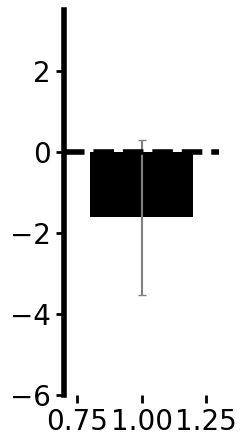

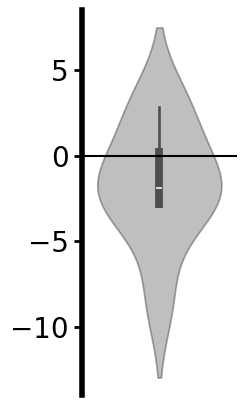

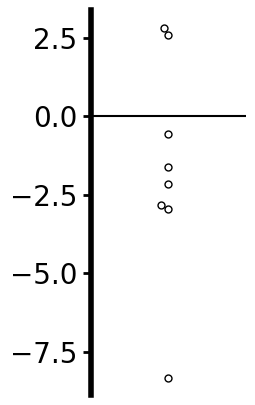

______
forward angle


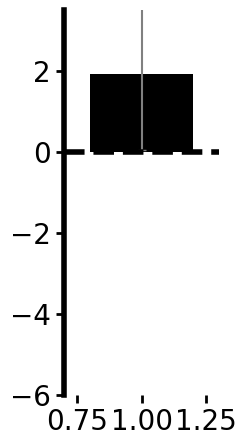

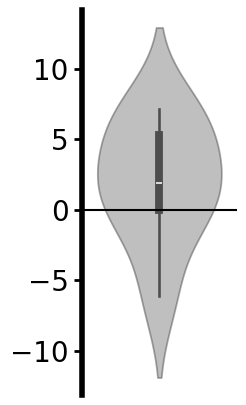

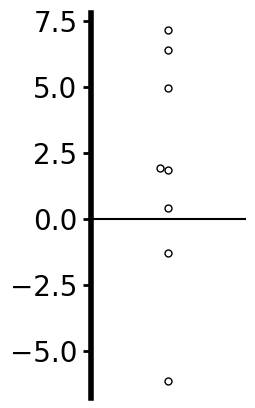

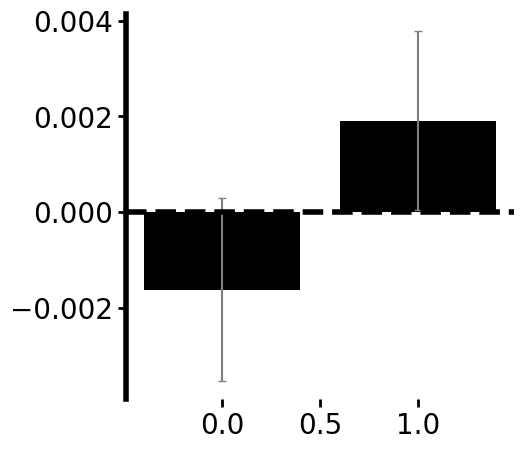

[-0.0016242172179729078, 0.001912603354571855]


In [57]:
print('''Task Space - betas for circular and forward angles within-anchor 
      when co-regressed (regressing out phase and place) ''')
scaling_factor=1000
means_all=[]
sems_all=[]
phase_place_diff=0
for ind,angle_type in enumerate(['circular angle','forward angle']):
    print('______')
    print(angle_type)
    
    coeffs_crossanchor_=coeffs_crossanchor_all[0][phase_place_diff][:,ind]
    sems_crossanchor_=sems_crossanchor_all[0][phase_place_diff][:,ind]
    coeffs_all_task=coeffs_crossanchor_
    sems_all_task=sems_crossanchor_

    task_mean=np.mean(coeffs_all_task)
    task_sem_mean=np.sqrt(np.sum(sems_all_task**2)/len(sems_all_task.T)**2)
    
    
    
    means_all.append(task_mean)
    sems_all.append(task_sem_mean)
    
    plt.rcParams["figure.figsize"] = (2,5)
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False


    plt.bar(1,task_mean*scaling_factor,yerr=task_sem_mean*scaling_factor,color='black',ecolor='grey',capsize=3,width=0.4)
    plt.axhline(0,color='black',ls='dashed',linewidth=4)

    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.xlim(0.7,1.3)
    plt.ylim(-0.006*scaling_factor,0.0035*scaling_factor)

    plt.savefig(Output_folder+'Pair_distance_vs_coactivity_Coregression_bar_preplay_'+\
                angle_type+'_.svg',\
                    bbox_inches = 'tight', pad_inches = 0) 
    plt.show()
    
    
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False

    data=(coeffs_all_task*scaling_factor).T

    filtered_data = remove_nan(data)

    sns.violinplot(filtered_data, color='grey',alpha=0.5)
    #sns.stripplot(filtered_data,color='white',edgecolor='black',linewidth=1,alpha=0.5)
    plt.axhline(0,color='black')
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.savefig(Output_folder+'Pair_distance_vs_coactivity_Coregression_bar_preplay_'+\
                angle_type+'_violin.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

    sns.swarmplot(filtered_data, color='white',edgecolor='black',linewidth=1)
    plt.axhline(0,color='black')
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.savefig(Output_folder+'Pair_distance_vs_coactivity_Coregression_bar_preplay_'+\
                angle_type+'_swarm.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

    
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
    
    
plt.bar(np.arange(len(means_all)),means_all,yerr=sems_all,color='black',ecolor='grey',capsize=3)
plt.axhline(0,color='black',ls='dashed',linewidth=4)

plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)

plt.savefig(Output_folder+'Pair_distance_vs_coactivity_Coregression_bar_preplay.svg',\
                bbox_inches = 'tight', pad_inches = 0) 
plt.show()

print(means_all)


In [58]:
t_values_=np.asarray(means_all)/np.asarray(sems_all)
print(t_values_)

N_=np.nanmean(N_all[:,0])
print(N_)

std_all=np.asarray(sems_all)*np.sqrt(N_)


from scipy.stats import ttest_ind_from_stats

tstat, pvalue = ttest_ind_from_stats(means_all[0], std_all[0], N_, 0, 0, 2, equal_var=False,)

print(tstat)
print(pvalue)

tstat, pvalue = ttest_ind_from_stats(means_all[1], std_all[1], N_, 0, 0, 2, equal_var=False,)

print(tstat)
print(pvalue)


[-0.84869071  1.02336246]
253.125
-0.8486907119783004
0.39685846974626027
1.0233624585132137
0.3071173905191041


Task Space - betas for circular and forward angles within-anchor 
      when co-regressed (regressing out phase and place) 
______
circular angle


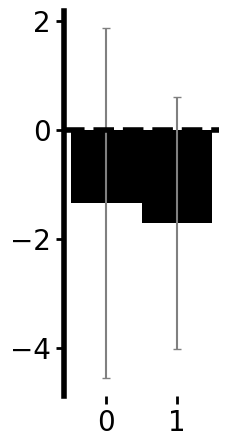

[-0.00135123 -0.00171521]
[0.00321465 0.00231583]
335.5
225.66666666666666
0.09186958767330691
0.9268350521358268
559.1666666666666
______
forward angle


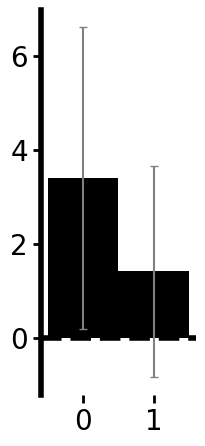

[0.00339937 0.00141701]
[0.00320926 0.00225062]
335.5
225.66666666666666
0.505732824175348
0.6132478340524878
559.1666666666666
______
spatial_corr


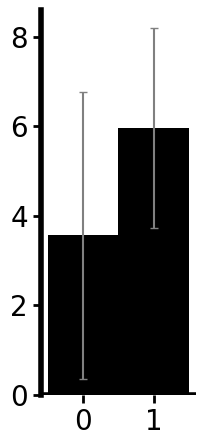

[0.00355863 0.00595946]
[0.003195   0.00222896]
335.5
225.66666666666666
-0.616282010106322
0.5379649870476297
559.1666666666666


In [60]:
print('''Task Space - betas for circular and forward angles within-anchor 
      when co-regressed (regressing out phase and place) ''')
scaling_factor=1000
means_all=[]
sems_all=[]
phase_place_diff=0

measures=['circular angle','forward angle','spatial_corr']
stage_types=['pre','post']

means_all_types=np.zeros((len(measures),len(stage_types)))
sems_all_types=np.zeros((len(measures),len(stage_types)))

means_all_types[:]=np.nan
sems_all_types[:]=np.nan

for measure_ind,measure in enumerate(measures):
    print('______')
    print(measure)
    
    
    for stage_type_ind, stage_type in enumerate(stage_types):
        ses_inds=np.where(np.asarray([stage_type in sleep_stages_unique[ii]\
                                      for ii in range(len(sleep_stages_unique))])==True)[0]
        coeffs_crossanchor_=coeffs_crossanchor_all[0][phase_place_diff][ses_inds,measure_ind]
        sems_crossanchor_=sems_crossanchor_all[0][phase_place_diff][ses_inds,measure_ind]
        coeffs_all_task=coeffs_crossanchor_
        sems_all_task=sems_crossanchor_

        task_mean=np.mean(coeffs_all_task)
        task_sem_mean=np.sqrt(np.sum(sems_all_task**2)/len(sems_all_task.T)**2)

        
        means_all_types[measure_ind][stage_type_ind]=task_mean
        sems_all_types[measure_ind][stage_type_ind]=task_sem_mean

    plt.rcParams["figure.figsize"] = (2,5)
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False


    plt.bar(np.arange(len(means_all_types[measure_ind])),means_all_types[measure_ind]*scaling_factor,\
            yerr=sems_all_types[measure_ind]*scaling_factor,color='black',ecolor='grey',capsize=3,width=1)
    plt.axhline(0,color='black',ls='dashed',linewidth=4)

    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.savefig(Output_folder+'Pair_'+measure+'_vs_coactivity_Coregression_bar_preplay.svg',\
                    bbox_inches = 'tight', pad_inches = 0) 
    plt.show()

    
    ###ttest for pre vs post
    ###claculated using: https://www.graphpad.com/quickcalcs/ttest2/
    print(means_all_types[measure_ind])
    print(sems_all_types[measure_ind])
    N_pre=np.nanmean(N_all[:2,0])
    N_post=np.nanmean(N_all[2:,0])
    print(N_pre)
    print(N_post)
    dof= (N_pre - 1) + (N_post - 1)
    
    
    
    
    std_0=np.asarray(sems_all_types[measure_ind][0])*np.sqrt(N_pre)
    std_1=np.asarray(sems_all_types[measure_ind][1])*np.sqrt(N_post)
    
    
    tstat, pvalue = ttest_ind_from_stats(means_all_types[measure_ind][0], std_0, N_pre,\
                                         means_all_types[measure_ind][1], std_1, N_post,\
                                        equal_var=False)

    print(tstat)
    print(pvalue)
    print(dof)


Task Space - betas for circular angles within versus between-anchor 
      when co-regressed (regressing out forward angle, phase and place) 
______
circular angle


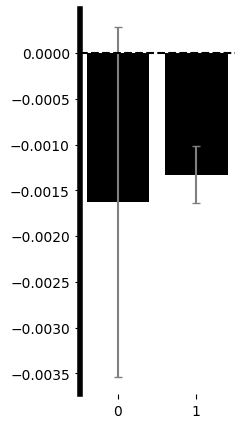

Within vs between


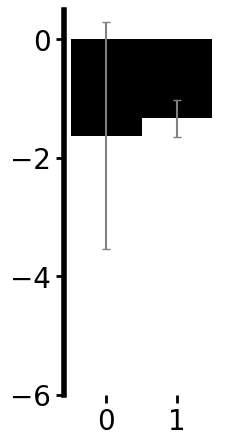

253.125
10640.75
-0.15272567925144717
0.43936523772100533
10891.875
-0.8486907119783004
0.39685846974626027
-4.239325323765657
2.2608561001387615e-05

Per Session
preX


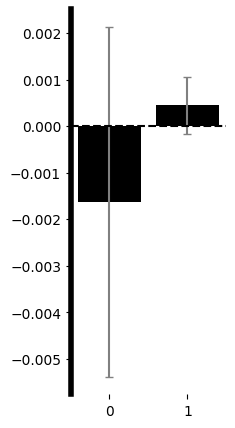

preX2


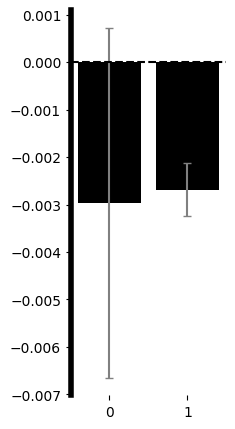

In [61]:
print('''Task Space - betas for circular angles within versus between-anchor 
      when co-regressed (regressing out forward angle, phase and place) ''')


ind=0
angle_type='circular angle'
print('______')
print(angle_type)

coeffs_crossanchor_=coeffs_crossanchor_all[ind]
sems_crossanchor_=sems_crossanchor_all[ind]

coeffs_all_task=np.vstack(([np.asarray(coeffs_crossanchor_)[ii][:,0] for ii in\
                                    np.arange(len(coeffs_crossanchor_))]))

sems_all_task=np.vstack(([np.asarray(sems_crossanchor_)[ii][:,0]\
                                  for ii in np.arange(len(coeffs_crossanchor_))]))

task_mean=np.mean(coeffs_all_task,axis=1)
task_sem_mean=np.sqrt(np.sum(sems_all_task**2,axis=1)/len(sems_all_task.T)**2)

plt.bar(np.arange(len(task_mean)),task_mean,yerr=task_sem_mean,color='black',ecolor='grey',capsize=3)
plt.axhline(0,color='black',ls='dashed')
plt.show()



print('Within vs between')

coeffs_crossanchor_task_all_mean=np.nanmean(coeffs_all_task[-1])
sems_crossanchor_task_all=sems_all_task[-1]
sems_crossanchor_task_all_mean=np.sqrt(np.sum(sems_crossanchor_task_all**2)/len(sems_crossanchor_task_all)**2)

within_vs_between_means=np.asarray([task_mean[0],coeffs_crossanchor_task_all_mean])
within_vs_between_sems=np.asarray([task_sem_mean[0],sems_crossanchor_task_all_mean])

plt.rcParams["figure.figsize"] = (2,5)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.bar(np.arange(2),within_vs_between_means*scaling_factor,yerr=within_vs_between_sems*scaling_factor,\
        color='black',ecolor='grey',capsize=3,width=1)


plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.ylim(-0.006*scaling_factor,0.0005*scaling_factor)
plt.savefig(Output_folder+angle_type+'_WithinvsBetween_coactivity_regression_bar.svg',\
                bbox_inches = 'tight', pad_inches = 0) 
plt.show()

N_within=np.nanmean(N_all[:,0])
N_between=np.nanmean(N_all[:,-1])
std_0=np.asarray(within_vs_between_sems[0])*np.sqrt(N_within)
std_1=np.asarray(within_vs_between_sems[1])*np.sqrt(N_between)
dof= (N_within - 1) + (N_between - 1)

tstat, pvalue = ttest_ind_from_stats(within_vs_between_means[0], std_0, N_within,\
                                     within_vs_between_means[1], std_1, N_between,\
                                    equal_var=False, alternative='less')
print(N_within)
print(N_between)
print(tstat)
print(pvalue)
print(dof)

tstat, pvalue = ttest_ind_from_stats(within_vs_between_means[0], std_0, N_within,\
                                    0, 0, 2, equal_var=False)
print(tstat)
print(pvalue)

tstat, pvalue = ttest_ind_from_stats(within_vs_between_means[1], std_1, N_between,\
                                    0, 0, 2, equal_var=False)
print(tstat)
print(pvalue)

print('')

print('Per Session')
###Session-wise regressions

for ii,name in enumerate(['preX','preX2']):
    print(name)
    plt.bar(np.arange(len(coeffs_all_task)),coeffs_all_task[:,ii],yerr=sems_all_task[:,ii],\
           color='black',ecolor='grey',capsize=3)
    plt.axhline(0,color='black',ls='dashed')
    plt.savefig(Output_folder+name+'_Pair_distance_vs_coactivity_regression_bar.svg',\
                bbox_inches = 'tight', pad_inches = 0) 
    plt.show()

###sem averaging taken from here: 
##https://stats.stackexchange.com/questions/21104/calculate-average-of-a-set-numbers-with-reported-standard-errors

In [62]:
##Task space distance and spatial corr vs sleep corrs
corr_crossanchor_task_all=[]
corr_crossanchor_space_all=[]
coeffs_crossanchor_all=[]
sems_crossanchor_all=[]

only_far=False
only_close=False

cross_corr_dic=rec_dd()
spatial_corr_thr=0.9
num_bins=8
bins_angles_=(np.arange(num_bins)+1)*(180//num_bins)
bins_angles_[-1]=bins_angles_[-1]+1
for circular_angle in [False]:#,False]:
    print('')
    print(circular_angle)
    corr_crossanchor_task=[]
    corr_crossanchor_space=[]
    coeffs_crossanchor=[]
    sems_crossanchor=[]
    N_all=[]
    
    binned_corrs_means_all=[]
    binned_corrs_sems_all=[]

    for phase_place_diff in np.arange(num_phase_place_diffs_):
        print(phase_place_diff)
        corr_phase_place_diff=[]
        corr_spatial_corr=[]

        coeffs_phase_place_diff=[]
        sems_phase_place_diff=[]
        N_place_phase_diff=[]
        
        Anchored_pairs_angles_all=[]
        Anchored_pairs_sleepcorrs_rebinned_all=[]

        for stage in sleep_stages_unique:# ['preX','preX2']:
            print(stage)
            try:

                Anchored_pairs_sleepcorrs_rebinned_=[]
                Anchored_pairs_angles_=[]
                Anchored_pairs_spatialcorrs_=[]
                Anchored_pairs_phases_=[]
                for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
                    if len(Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_sleepcorrs_rebinned']\
                           [stage][mouse_recday])>0:
                        Anchored_pairs_sleepcorrs_rebinned_day_=np.copy(Sleepcorr_pairs_dic[phase_place_diff]\
                        ['Anchored_pairs_sleepcorrs_rebinned'][stage][mouse_recday])
                        Anchored_pairs_angles_day_=np.copy(Sleepcorr_pairs_dic[phase_place_diff]\
                                                      ['Anchored_pairs_angles'][stage][mouse_recday])
                        Anchored_pairs_spatialcorrs_day_=np.copy(Sleepcorr_pairs_dic[phase_place_diff]\
                                                            ['Anchored_pairs_Spatialcorrs'][stage][mouse_recday])
                        Anchored_pairs_phases_day_=np.copy(Sleepcorr_pairs_dic[phase_place_diff]['Anchored_pairs_phases']\
                                                            [stage][mouse_recday])                        
                        
                        
                        
                        
                        Anchored_pairs_sleepcorrs_rebinned_.append(Anchored_pairs_sleepcorrs_rebinned_day_)
                        Anchored_pairs_angles_.append(Anchored_pairs_angles_day_)
                        Anchored_pairs_spatialcorrs_.append(Anchored_pairs_spatialcorrs_day_)
                        Anchored_pairs_phases_.append(Anchored_pairs_phases_day_)
                        

                        ###per day analysis
                        filter_boolean_nan_day=~np.isnan(Anchored_pairs_angles_day_)
                        Anchored_pairs_angles_unfiltered_day=Anchored_pairs_angles_day_
                        Anchored_pairs_angles_day_[filter_boolean_nan_day]=\
                        abs((Anchored_pairs_angles_day_[filter_boolean_nan_day]))
                        
                        

                        if only_far==True:
                            filter_boolean_day_=np.logical_and(Anchored_pairs_spatialcorrs_day_<spatial_corr_thr\
                                                               ,Anchored_pairs_angles_day_>=180)
                        elif only_close==True:
                            filter_boolean_day_=np.logical_and(Anchored_pairs_spatialcorrs_day_<spatial_corr_thr\
                                                               ,Anchored_pairs_angles_day_<180)
                            
                        else:
                            filter_boolean_day_=Anchored_pairs_spatialcorrs_day_<spatial_corr_thr

                        if circular_angle==True:
                            Anchored_pairs_angles_day_[Anchored_pairs_angles_day_>=180]=\
                            360-Anchored_pairs_angles_day_[Anchored_pairs_angles_day_>=180]                        

                        filter_boolean_day=filter_boolean_day_

                       
                        Anchored_pairs_angles_day=Anchored_pairs_angles_day_[filter_boolean_day]
                        Anchored_pairs_spatialcorrs_day=Anchored_pairs_spatialcorrs_day_[filter_boolean_day]
                        Anchored_pairs_phases_day=Anchored_pairs_phases_day_[filter_boolean_day]
                        Anchored_pairs_sleepcorrs_rebinned_day=Anchored_pairs_sleepcorrs_rebinned_day_[filter_boolean_day]
                        

                        if phase_place_diff==0:
                            
                            

                            Anchored_pairs_angles_bin=np.digitize(Anchored_pairs_angles_day,bins_angles_)

                            binned_corrs_means_day=np.asarray([np.nanmean(Anchored_pairs_sleepcorrs_rebinned_day\
                                                                      [Anchored_pairs_angles_bin==bin_])\
                                                           for bin_ in np.arange(num_bins)])
                            
                            cross_corr_dic['angles'][stage][mouse_recday]=Anchored_pairs_angles_day
                            cross_corr_dic['sleep_corrs'][stage][mouse_recday]=Anchored_pairs_sleepcorrs_rebinned_day
                            cross_corr_dic['binned_corrs_means'][mouse_recday][stage]=binned_corrs_means_day
            except:
                print('Not done')


False
0
post0
post1
post2
post3
post4
post5
preX
preX2
1
post0
post1
post2
post3
post4
post5
preX
preX2
2
post0
post1
post2
post3
post4
post5
preX
preX2
3
post0
post1
post2
post3
post4
post5
preX
preX2
4
post0
post1
post2
post3
post4
post5
preX
preX2


C:\Users\moham\AppData\Local\Temp\ipykernel_32148\3630945939.py:105: RuntimeWarning: Mean of empty slice
  binned_corrs_means_day=np.asarray([np.nanmean(Anchored_pairs_sleepcorrs_rebinned_day\


post0


C:\Users\moham\AppData\Local\Temp\ipykernel_32148\780186529.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


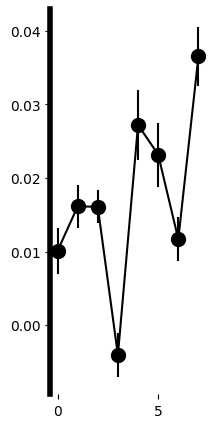

PearsonRResult(statistic=-0.08146204909027528, pvalue=0.31203602754808657)
PearsonRResult(statistic=0.0671641741696835, pvalue=0.34961278085091135)
post1


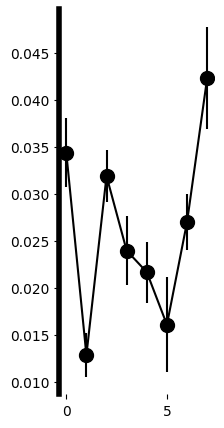

PearsonRResult(statistic=-0.06834432937575732, pvalue=0.3592813990177187)
PearsonRResult(statistic=0.13966650367420247, pvalue=0.05397782271100305)
post2


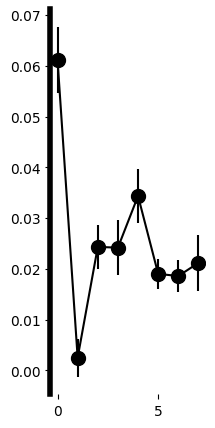

PearsonRResult(statistic=-0.171210310934335, pvalue=0.05625175908366802)
PearsonRResult(statistic=-0.03885335254119232, pvalue=0.6149374219487633)
post3


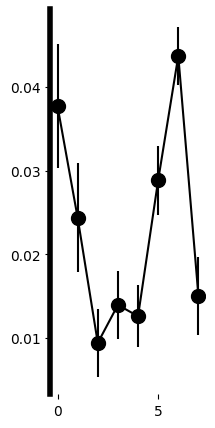

PearsonRResult(statistic=-0.13740123175216953, pvalue=0.1642575451812314)
PearsonRResult(statistic=0.006619718039274549, pvalue=0.938804357566508)
post4


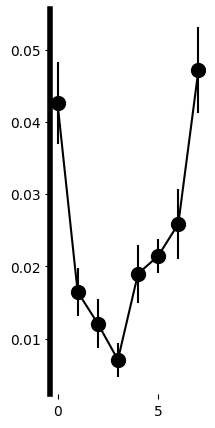

PearsonRResult(statistic=-0.18070719027351317, pvalue=0.03019951919153689)
PearsonRResult(statistic=0.13545460013651578, pvalue=0.08000417749051249)
post5


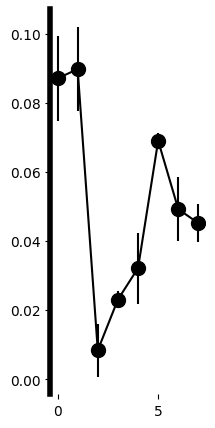

PearsonRResult(statistic=-0.3615778230775377, pvalue=0.07573650394475771)
PearsonRResult(statistic=-0.03599940606937442, pvalue=0.8449197906485069)
preX


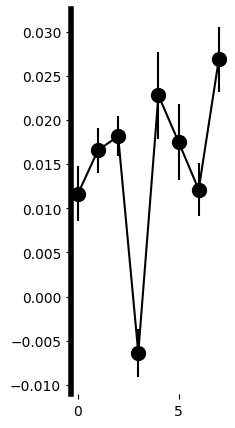

PearsonRResult(statistic=-0.08254701066103423, pvalue=0.3056135778344305)
PearsonRResult(statistic=0.0452175615331901, pvalue=0.5291404419767096)
preX2


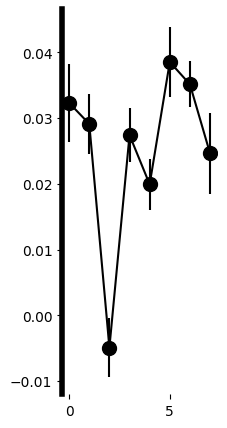

PearsonRResult(statistic=-0.09107642224359991, pvalue=0.35784034459115216)
PearsonRResult(statistic=0.023769659471004255, pvalue=0.7827735058720717)


In [63]:
num_bins=8
scaling_factor=360/num_bins
bins_=np.arange(num_bins+1)*scaling_factor
means_all=[]
sems_all=[]
for stage in sleep_stages_unique:
    print(stage)
    angles_all_stage_=np.hstack((dict_to_array(cross_corr_dic['angles'][stage])))
    sleep_corr_all_stage_=np.hstack((dict_to_array(cross_corr_dic['sleep_corrs'][stage])))


    means=st.binned_statistic(angles_all_stage_,sleep_corr_all_stage_,bins=bins_)[0]
    std=st.binned_statistic(angles_all_stage_,sleep_corr_all_stage_,'std',bins=bins_)[0]
    sem=std/np.sqrt(len(angles_all_stage_))
    plt.errorbar(x=np.arange(num_bins),y=means,\
             yerr=sem, marker='o',markersize=10,color='black')
    plt.show()
    
    xy=column_stack_clean(angles_all_stage_,sleep_corr_all_stage_)
    
    means_all.append(means)
    sems_all.append(sem)
    

    sleep_corr_all_stage_close=sleep_corr_all_stage_[angles_all_stage_<180]
    angles_all_stage_close=angles_all_stage_[angles_all_stage_<180]
    sleep_corr_all_stage_far=sleep_corr_all_stage_[angles_all_stage_>=180]
    angles_all_stage_far=angles_all_stage_[angles_all_stage_>=180]

    print(st.pearsonr(angles_all_stage_close,sleep_corr_all_stage_close))

    print(st.pearsonr(angles_all_stage_far,sleep_corr_all_stage_far))
    
means_all=np.vstack((means_all)).T
sems_all=np.vstack((sems_all)).T
means_mean=np.mean(means_all,axis=1)
sems_mean=np.sqrt(np.sum(sems_all**2,axis=1)/len(sems_all.T)**2)

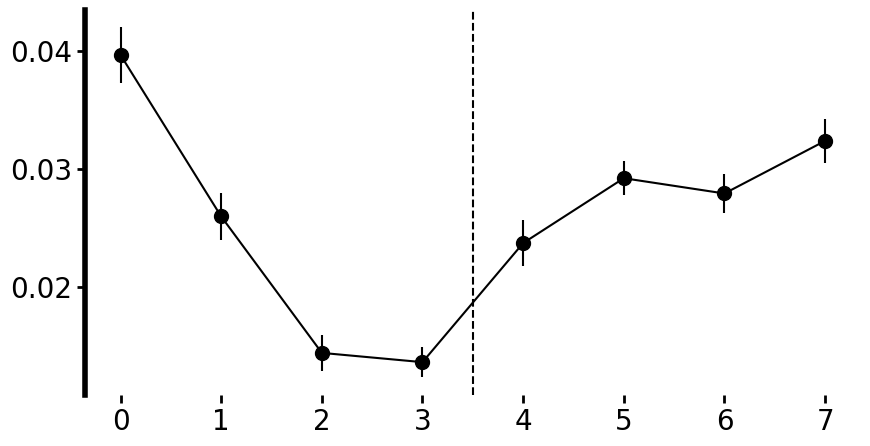

In [65]:
from statsmodels.stats.anova import AnovaRM
from scipy.stats import tukey_hsd


plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.errorbar(x=np.arange(num_bins),y=means_mean,\
             yerr=sems_mean, marker='o',markersize=10,color='black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.axvline(3.5,ls='dashed',color='black')

plt.savefig(Output_folder+'Forward_distance_vs_corr_Allsleep.svg',\
            bbox_inches = 'tight', pad_inches = 0) 
plt.show()



In [66]:
num_bins=9
scaling_factor=360/num_bins
bins_=np.arange(num_bins+1)*scaling_factor
min_pairs_day=10
means_all_all=[]
means_all_all_sessions=[]
corr_close_far_all=[]
corr_close_far_all_sessions=[]
days_used_analysis_=[]
num_pairs_all=[]
for mouse_recday in np.load(Input_folder+'combined_ABCDonly_days.npy'):
    means_all=[]
    sems_all=[]
    corr_close_far_day=[]
    num_pairs_day=[]
    for stage in sleep_stages_unique:
        angles_all_stage_=cross_corr_dic['angles'][stage][mouse_recday]
        sleep_corr_all_stage_=cross_corr_dic['sleep_corrs'][stage][mouse_recday]
        
        if len(angles_all_stage_)==0:
            continue
        print(mouse_recday)
        sleep_corr_all_stage_close=sleep_corr_all_stage_[angles_all_stage_<180]
        angles_all_stage_close=angles_all_stage_[angles_all_stage_<180]
        sleep_corr_all_stage_far=sleep_corr_all_stage_[angles_all_stage_>=180]
        angles_all_stage_far=angles_all_stage_[angles_all_stage_>=180]
        
        
        
        if len(angles_all_stage_close)>min_pairs_day:
            corr_close=st.pearsonr(angles_all_stage_close,sleep_corr_all_stage_close)[0]
            days_used_analysis_.append(mouse_recday)
        else:
            corr_close=np.nan
            
        if len(angles_all_stage_far)>min_pairs_day:
            corr_far=st.pearsonr(angles_all_stage_far,sleep_corr_all_stage_far)[0]
        else:
            corr_far=np.nan
            
        corr_close_far_day.append([corr_close,corr_far])
        
        
        num_pairs=len(angles_all_stage_)
        num_pairs_day.append(num_pairs)
        

        means=st.binned_statistic(angles_all_stage_,sleep_corr_all_stage_,bins=bins_)[0]
        std=st.binned_statistic(angles_all_stage_,sleep_corr_all_stage_,'std',bins=bins_)[0]
        sem=std/np.sqrt(len(angles_all_stage_))

        xy=column_stack_clean(angles_all_stage_,sleep_corr_all_stage_)

        means_all.append(means)
    if len(means_all)>0:
        means_all_day=np.nanmean(np.vstack((means_all)),axis=0)
        means_all_all.append(means_all_day)
        means_all_all_sessions.append(np.vstack((means_all)))
    
    
        corr_close_far_all.append(np.nanmean(np.vstack((corr_close_far_day)),axis=0))
        corr_close_far_all_sessions.append(np.vstack((corr_close_far_day)))
        num_pairs_all.append(np.min(num_pairs_day))
        
    else:
        print('Not used')
corr_close_far_all=np.vstack((corr_close_far_all))
corr_close_far_all_sessions=np.vstack((corr_close_far_all_sessions))
days_used_analysis_=np.unique(np.hstack((days_used_analysis_)))

ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_01092023_02092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_05092023_06092023
ab03_29082023_30082023
ab03_29082023_30082023
ab03_29082023_30082023
ab03_29082023_30082023
ab03_29082023_30082023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_12082021_13082021
ah03_12082021_13082021
ah03_12082021_13082021
ah03_12082021_13082021
ah03_12082021_13082021
ah03_18082021_19082021
ah03_18082021_19082021
ah03_18082021_19082021
ah03_18082021_19082021
ah03_18082021_19082021
ah03_18082021_19082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_05122021_06122021
ah04_051220

C:\Users\moham\AppData\Local\Temp\ipykernel_32148\879548656.py:61: RuntimeWarning: Mean of empty slice
  corr_close_far_all.append(np.nanmean(np.vstack((corr_close_far_day)),axis=0))
C:\Users\moham\AppData\Local\Temp\ipykernel_32148\879548656.py:56: RuntimeWarning: Mean of empty slice
  means_all_day=np.nanmean(np.vstack((means_all)),axis=0)


ah07_27082023_28082023
ah07_27082023_28082023
ah07_27082023_28082023
ah07_27082023_28082023
ah07_27082023_28082023
ah07_27082023_28082023
ah07_27082023_28082023
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used
Not used


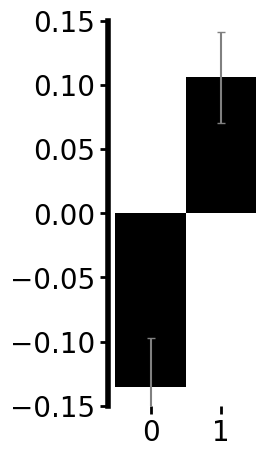

36
TtestResult(statistic=-5.159340634691687, pvalue=9.907477782124631e-06, df=35)
TtestResult(statistic=-3.5911097975549193, pvalue=0.0010001034165770183, df=35)
TtestResult(statistic=3.0013660887401867, pvalue=0.004931266951221815, df=35)


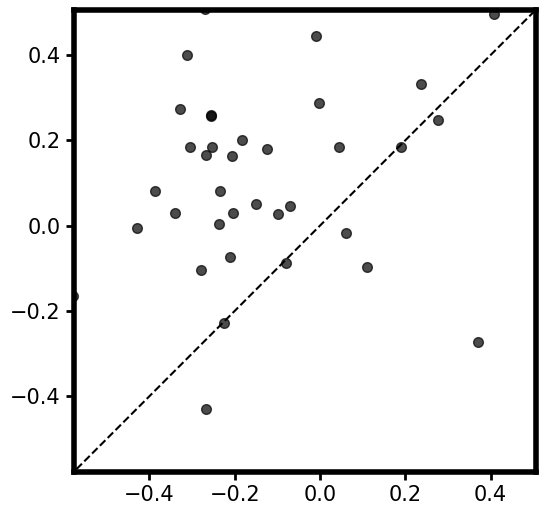

WilcoxonResult(statistic=76.0, pvalue=1.4609657227993011e-05)
36


In [68]:
plt.rcParams["figure.figsize"] = (2,5)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


xy=column_stack_clean(corr_close_far_all_sessions[:,0],corr_close_far_all_sessions[:,1])

plt.bar(np.arange(2),np.nanmean(xy,axis=0),\
        yerr=st.sem(xy,axis=0,nan_policy='omit'),\
        color='black',ecolor='grey',capsize=3,width=1)


plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.ylim(-0.15, 0.15)
plt.savefig(Output_folder+angle_type+'_closevsfar_correlation_bar_sessions.svg',\
                bbox_inches = 'tight', pad_inches = 0) 
plt.show()
print(len(xy))
print(st.ttest_rel(xy[:,0],xy[:,1]))
print(st.ttest_1samp(xy[:,0],0))
print(st.ttest_1samp(xy[:,1],0))

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.gca().set_aspect('equal', adjustable='box')
plt.tick_params(axis='both',  labelsize=15)
plt.tick_params(width=2, length=6)

plt.savefig(Output_folder+angle_type+'_closevsfar_correlation_scatter_sessions.svg',\
           bbox_inches = 'tight', pad_inches = 0)
plt.show()
print(st.wilcoxon(xy[:,0],xy[:,1]))
print(len(xy))